In [ ]:
!pip install graphviz

In [ ]:
from sklearn.datasets import load_iris
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

dt_clf = DecisionTreeClassifier(random_state=156)

iris_data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, 
                                                    test_size=0.2, random_state=11)

dt_clf.fit(X_train,y_train)

DecisionTreeClassifier(random_state=156)

In [ ]:
export_graphviz(dt_clf, out_file="tree.dot",class_names=iris_data.target_names,
                feature_names = iris_data.feature_names, impurity=True, filled = True)

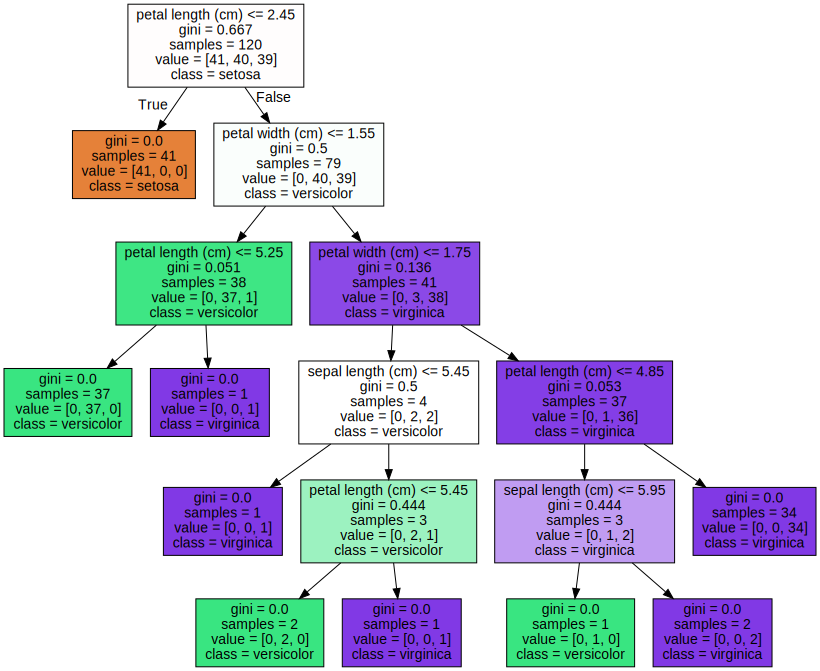

In [ ]:
import graphviz

with open("tree.dot") as f:
  dot_graph = f.read()
graphviz.Source(dot_graph)

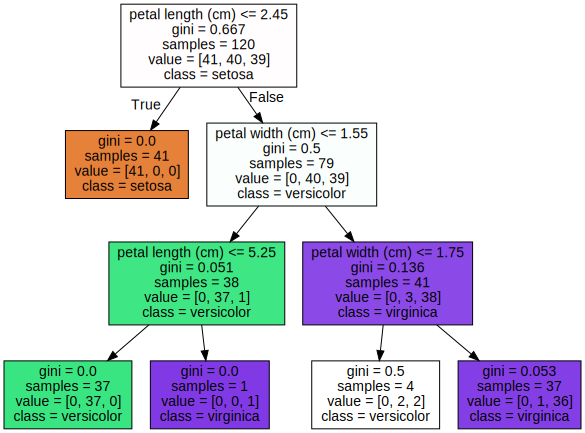

In [ ]:
dt_clf = DecisionTreeClassifier(random_state=156,max_depth=3)

dt_clf.fit(X_train,y_train)

export_graphviz(dt_clf, out_file="tree.dot",class_names=iris_data.target_names,
                feature_names = iris_data.feature_names, impurity=True, filled = True)

import graphviz

with open("tree.dot") as f:
  dot_graph = f.read()
graphviz.Source(dot_graph)

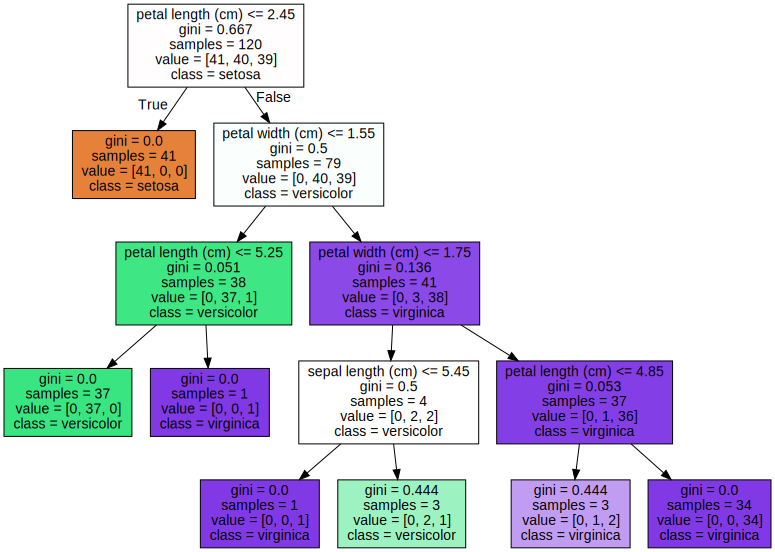

In [ ]:
dt_clf = DecisionTreeClassifier(random_state=156,min_samples_split=4)

dt_clf.fit(X_train,y_train)

export_graphviz(dt_clf, out_file="tree.dot",class_names=iris_data.target_names,
                feature_names = iris_data.feature_names, impurity=True, filled = True)

import graphviz

with open("tree.dot") as f:
  dot_graph = f.read()
graphviz.Source(dot_graph)

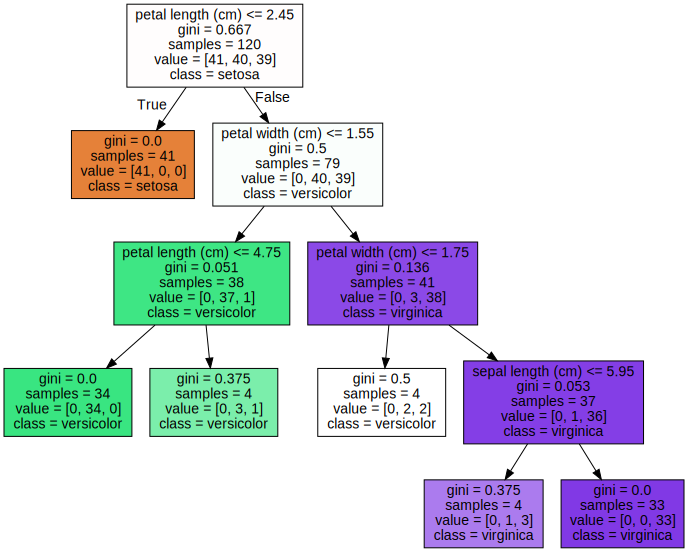

In [ ]:
dt_clf = DecisionTreeClassifier(random_state=156,min_samples_leaf=4)

dt_clf.fit(X_train,y_train)

export_graphviz(dt_clf, out_file="tree.dot",class_names=iris_data.target_names,
                feature_names = iris_data.feature_names, impurity=True, filled = True)

import graphviz

with open("tree.dot") as f:
  dot_graph = f.read()
graphviz.Source(dot_graph)

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix

In [ ]:
import pandas as pd
titanic_data = pd.read_csv('/content/titanic_data_clean.csv')

In [ ]:
titanic_data

,Pclass,Sex,Fare,Survived
0,3,male,7.2500,0
1,1,female,71.2833,1
2,3,female,7.9250,1
3,1,female,53.1000,1
4,3,male,8.0500,0
...,...,...,...,...
886,2,male,13.0000,0
887,1,female,30.0000,1
888,3,female,23.4500,0
889,1,male,30.0000,1


In [ ]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    object 
 2   Fare      891 non-null    float64
 3   Survived  891 non-null    int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 28.0+ KB


In [ ]:
t_features = titanic_data[titanic_data.columns[:-1]]
t_target = titanic_data[titanic_data.columns[-1]]

In [ ]:
t_features["Sex"] = t_features.Sex.map({"female":0, "male":1})

In [ ]:
t_features = pd.get_dummies(data = t_features, columns=['Pclass'], prefix='Pclass')

In [ ]:
train_features, test_features, train_target, test_target = train_test_split(t_features,t_target,test_size=0.2,
                                                                            random_state=2021, stratify = t_target)

In [ ]:
pd.DataFrame(train_target)['Survived'].value_counts()

0    439
1    273
Name: Survived, dtype: int64

In [ ]:
import sklearn
x_shuffled = sklearn.utils.shuffle(train_features, random_state=2021)
y_shuffled = sklearn.utils.shuffle(train_target, random_state=2021)

import imblearn
from imblearn.under_sampling import RandomUnderSampler
train_features_us, train_target_us = RandomUnderSampler(random_state=20210).fit_resample(x_shuffled,y_shuffled)


In [ ]:
pd.DataFrame(train_target_us)['Survived'].value_counts()

1    273
0    273
Name: Survived, dtype: int64

In [ ]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(criterion='gini', random_state=2021)

tree_fit = tree.fit(train_features_us, train_target_us)

In [ ]:
!pip install graphviz

In [ ]:
from sklearn.tree import export_graphviz

In [ ]:
feature_names = train_features_us.columns.tolist()

target_name = np.array(['Dead','Survive'])

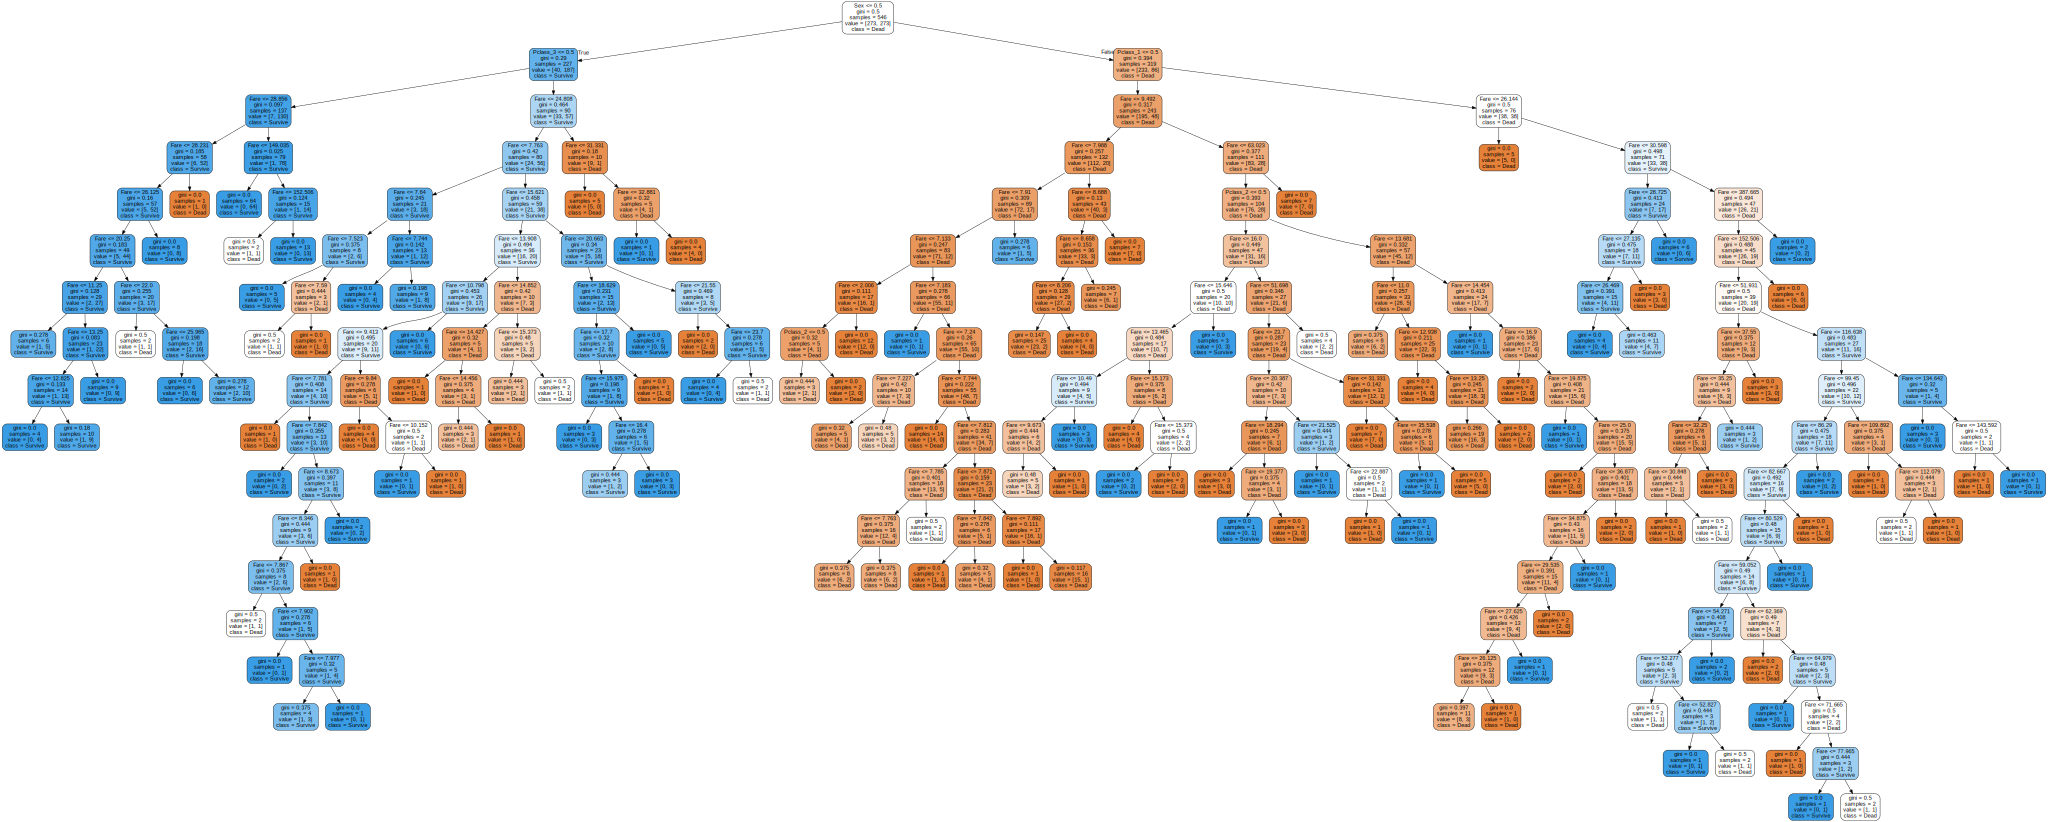

In [ ]:
dot_data = export_graphviz(tree,
                           filled = True,
                           rounded = True,
                           class_names = target_name,
                           feature_names = feature_names)
import graphviz
graphviz.Source(dot_data)

In [ ]:
scores = cross_validate(estimator= tree,
                        X = train_features_us,
                        y = train_target_us,
                        scoring = ['accuracy'],
                        cv =10,
                        n_jobs = -1,
                        return_train_score = False)

print("CV accuracy: %s" %scores['test_accuracy'])
print("CV accuracy(Mean) : %.3f(std:%.3f)" %(np.mean(scores['test_accuracy']),
                                             np.std(scores['test_accuracy'])))

CV accuracy: [0.83636364 0.70909091 0.74545455 0.74545455 0.72727273 0.74545455
 0.75925926 0.7037037  0.83333333 0.85185185]
CV accuracy(Mean) : 0.766(std:0.052)


In [ ]:
y_pred = tree.predict(test_features)
y_pred

array([1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0])

In [ ]:
confmat = pd.DataFrame(confusion_matrix(test_target, y_pred),
                       index=['True[0]','True[1]'],
                       columns=['Predict[0]','Predict[1]'])
confmat

,Predict[0],Predict[1]
True[0],95,15
True[1],20,49


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score, roc_auc_score

print('정확도 acuracy: %.3f' %accuracy_score(test_target,y_pred))
print('정밀도 precision: %.3f' %precision_score(y_true=test_target, y_pred=y_pred))
print('재현율 recall: %.3f' %recall_score(y_true=test_target, y_pred=y_pred))
print('F1-score: %.3f' %f1_score(y_true=test_target, y_pred=y_pred))
print('AUC: %.3f' %roc_auc_score(test_target, y_pred))


정확도 acuracy: 0.804
정밀도 precision: 0.766
재현율 recall: 0.710
F1-score: 0.737
AUC: 0.787


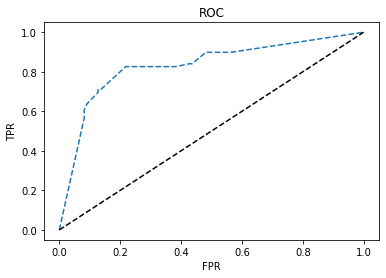

In [ ]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(test_target, tree.predict_proba(test_features)[:,1])

plt.plot(fpr,tpr, '--',label='Decision Tree')
plt.plot([0,1],[0,1],'k--',label='random guess')
plt.plot([fpr],[tpr],'r--',ms=10)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC')
plt.show()

In [ ]:
dt_clf = DecisionTreeClassifier(random_state=2021)

print('DecisionTreeClassifier 기본 하이퍼 파라미터 : \n', dt_clf.get_params())

DecisionTreeClassifier 기본 하이퍼 파라미터 : 
 {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 2021, 'splitter': 'best'}


In [ ]:
param_range1 = [1,2,3,4,5,6,7,8,9,10]
param_range2 = [10,20,30,40,50]
param_range3 = ['gini','entropy']

param_grid = [{'max_depth' : param_range1,
               'min_samples_leaf':param_range2,
               'criterion':param_range3}]

gs = GridSearchCV(estimator=dt_clf,
                  param_grid = param_grid,
                  scoring = 'accuracy',
                  cv =10,
                  n_jobs=-1)
gs.fit(train_features_us,train_target_us)

print("GridSearchCV 최고 평균 정확도 수치 : {0:.4f}".format(gs.best_score_))
print("GridSearchCV 최적 하이퍼 파라미터 : ",gs.best_params_)

GridSearchCV 최고 평균 정확도 수치 : 0.7841
GridSearchCV 최적 하이퍼 파라미터 :  {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 10}


In [ ]:
best_tree = gs.best_estimator_
best_tree.fit(train_features_us, train_target_us)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=10, random_state=2021)

In [ ]:
y_pred = best_tree.predict(test_features)
y_pred

array([0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 0])

In [ ]:
confmat = pd.DataFrame(confusion_matrix(test_target, y_pred), 
                       index=['True[0]','True[1]'],
                       columns=['Predict[0]','Predict[1]'])
confmat

,Predict[0],Predict[1]
True[0],78,32
True[1],17,52


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score, roc_auc_score

print('정확도 acuracy: %.3f' %accuracy_score(test_target,y_pred))
print('정밀도 precision: %.3f' %precision_score(y_true=test_target, y_pred=y_pred))
print('재현율 recall: %.3f' %recall_score(y_true=test_target, y_pred=y_pred))
print('F1-score: %.3f' %f1_score(y_true=test_target, y_pred=y_pred))
print('AUC: %.3f' %roc_auc_score(test_target, y_pred))

정확도 acuracy: 0.726
정밀도 precision: 0.619
재현율 recall: 0.754
F1-score: 0.680
AUC: 0.731


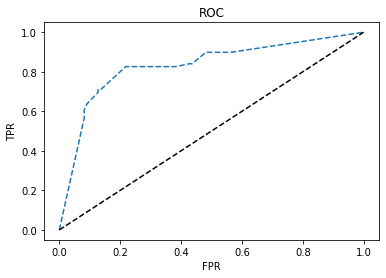

In [ ]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(test_target, tree.predict_proba(test_features)[:,1])

plt.plot(fpr,tpr, '--',label='Decision Tree')
plt.plot([0,1],[0,1],'k--',label='random guess')
plt.plot([fpr],[tpr],'r--',ms=10)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC')
plt.show()

In [ ]:
feature_names = train_features_us.columns.tolist()

target_name = np.array(['Dead','Survive'])

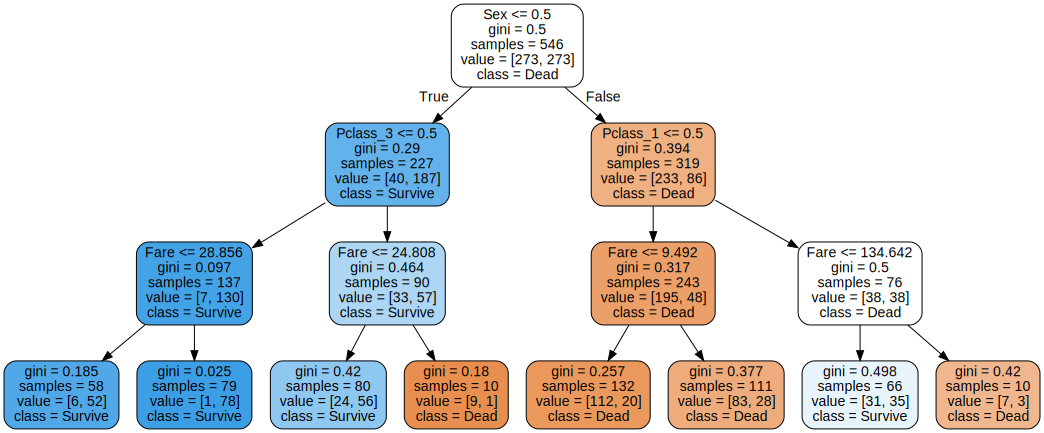

In [ ]:
dot_data_best = export_graphviz(best_tree,
                           filled = True,
                           rounded = True,
                           class_names = target_name,
                           feature_names = feature_names)
import graphviz
graphviz.Source(dot_data_best)

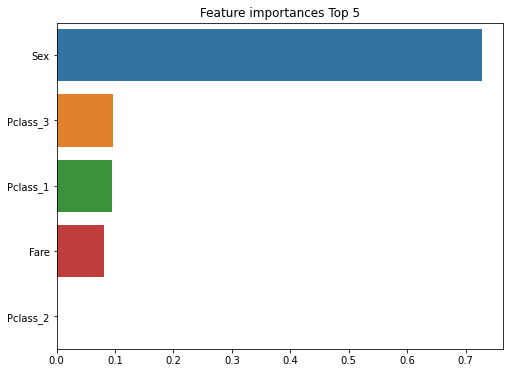

In [ ]:
feature_importance_values = best_tree.feature_importances_
feature_importances = pd.Series(feature_importance_values, index=train_features_us.columns)

feature_top5 = feature_importances.sort_values(ascending=False)[:5]

plt.figure(figsize=[8,6])
plt.title('Feature importances Top 5')
sns.barplot(x=feature_top5, y=feature_top5.index)
plt.show()

In [ ]:
feature_importances.sort_values(ascending=False)

Sex         0.727547
Pclass_3    0.096615
Pclass_1    0.094602
Fare        0.081236
Pclass_2    0.000000
dtype: float64